Đã đến lúc xây dựng mạng nơ-ron đầu tiên của bạn, mạng này sẽ có một lớp ẩn (hiden layer). Bạn sẽ thấy sự khác biệt lớn giữa mô hình này và mô hình bạn đã triển khai bằng cách sử dụng hồi quy logistic.

**Bạn sẽ học được:**
- Triển khai mạng nơ-ron phân loại 2 lớp với một lớp ẩn duy nhất
- Sử dụng các đơn vị có hàm kích hoạt phi tuyến tính, chẳng hạn như tanh
- Tính toán mất mát cross-entropy
- Thực hiện lan truyền xuôi (forward propagation) và lan truyền ngược (backward propagation)


## 1 - Thư viện ##

Đầu tiên, hãy nhập tất cả các thư viện mà chúng ta cần cho lab này.
- [numpy](www.numpy.org) là thư viện cơ bản cho tính toán khoa học với Python.
- [sklearn](http://scikit-learn.org/stable/) cung cấp các công cụ đơn giản và hiệu quả để khai thác và phân tích dữ liệu.
- [matplotlib](http://matplotlib.org) là một thư viện để vẽ đồ thị trong Python.
- testCases cung cấp một số ví dụ thử nghiệm để đánh giá tính đúng đắn của các hàm của bạn
- planar_utils cung cấp các hàm hữu ích khác nhau được sử dụng trong lab này

In [1]:
# Import thư viện
import numpy as np
import matplotlib.pyplot as plt
from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

np.random.seed(1) # thiết lập seed để các kết quả thống nhất

## 2 - Tập dữ liệu ##

Đầu tiên, hãy lấy tập dữ liệu mà chúng ta sẽ làm việc. Đoạn code sau sẽ tải tập dữ liệu 2 lớp "flower" vào các biến `X` và` Y`.

In [2]:
X, Y = load_planar_dataset()

Hãy hình dung tập dữ liệu bằng matplotlib. Dữ liệu trông giống như một "bông hoa" với một số điểm màu đỏ (nhãn y = 0) và một số điểm màu xanh dương (y = 1). Mục tiêu của chúng ta là xây dựng một mô hình phù hợp với dữ liệu này.

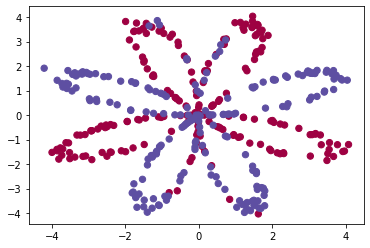

In [3]:
# Trực quan hóa dữ liệu:
plt.scatter(X[0, :], X[1, :], c=Y[0,:], s=40, cmap=plt.cm.Spectral);

Bạn có:
    - một mảng numpy (ma trận) X chứa các đặc trưng (x1, x2)
    - một mảng numpy (vectơ) Y chứa các nhãn (red:0, blue:1).

Trước tiên, hãy hiểu rõ hơn về dữ liệu của chúng ta.

**Task 1**: Bạn có bao nhiêu ví dụ huấn luyện? Ngoài ra, `shape` của các biến ` X` và `Y` là gì?

**Gợi ý**: Làm thế nào để bạn có được hình dạng của một mảng numpy? [(trợ giúp)](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html)

In [4]:
### BẮT ĐẦU CODE Ở ĐÂY ### (≈ 3 dòng code)
shape_X = X.shape
shape_Y = Y.shape
m = X[0].shape # kích thước tập huấn luyện
### KẾT THÚC CODE Ở ĐÂY ###

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' %m)

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have m = 400 training examples!


**Kỳ vọng đầu ra**:
       
<table style="width:20%">
  
  <tr>
    <td>**shape of X**</td>
    <td> (2, 400) </td> 
  </tr>
  
  <tr>
    <td>**shape of Y**</td>
    <td>(1, 400) </td> 
  </tr>
  
    <tr>
    <td>**m**</td>
    <td> 400 </td> 
  </tr>
  
</table>

## 3 - Hồi quy Logistic đơn giản

Trước khi xây dựng một mạng nơ-ron đầy đủ, hãy xem hồi quy logistic hoạt động như thế nào đối với bài toán này. Bạn có thể sử dụng các hàm có sẵn của sklearn để thực hiện điều đó. Chạy code bên dưới để huấn luyện bộ phân loại hồi quy logistic trên tập dữ liệu.

In [5]:
# Huấn luyện phân loại hồi quy logistic 
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T);

c:\users\user\.conda\envs\ai_training\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
def plot_decision_boundary(model, X, y):
    print(X.shape, y.shape)
    # Thiết lập một số giá trị min, max và thêm đệm
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Tạo lưới của các điểm với khoảng cách h giữa chúng
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Dự đoán giá trị hàm cho toàn bộ lưới
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Vẽ biểu đồ contour và các ví dụ huấn luyện
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    #plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    plt.scatter(X[0, :], X[1, :], c=y[0,:], cmap=plt.cm.Spectral)

Bây giờ bạn có thể vẽ ranh giới quyết định (decision boundary) của các mô hình này. Chạy code bên dưới.

(2, 400) (1, 400)
Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


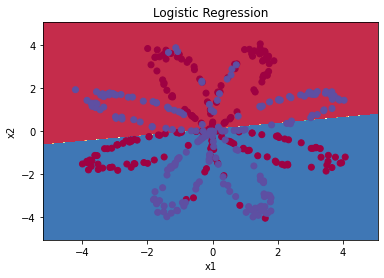

In [7]:
# Vẽ ranh giới quyết định cho hồi quy logistic
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

# In ra độ chính xác
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

**Kỳ vọng đầu ra**:

<table style="width:20%">
  <tr>
    <td>**Accuracy**</td>
    <td> 47% </td> 
  </tr>
  
</table>


**Giải thích**: Tập dữ liệu không thể phân tách tuyến tính, vì vậy hồi quy logistic không hoạt động tốt. Hy vọng rằng mạng nơ-ron sẽ hoạt động tốt hơn. Hãy thử điều này ngay bây giờ!

## 4 - Mô hình mạng nơ-ron

Hồi quy logistic không hoạt động tốt trên "tập dữ liệu flower". Chúng ta sẽ huấn luyện một mạng nơ-ron với một lớp ẩn duy nhất.

**Đây là mô hình của chúng ta**:
<img src="images/classification_kiank.png" style="width:600px;height:300px;">

**Về mặt toán học**:

Cho ví dụ $x^{(i)}$:
$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1] (i)}\tag{1}$$ 
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2] (i)}\tag{3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{5}$$

Với các dự đoán ở tất cả các ví dụ, chúng ta cũng có thể tính mất mát (cost) $ J $ như sau:
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$

**Nhắc nhở**: Phương pháp chung để xây dựng Mạng nơ-ron là:
    1. Xác định cấu trúc mạng nơ-ron ( # đơn vị đầu vào,  # đơn vị ẩn,...). 
    2. Khởi tạo các thông số của mô hình
    3. Vòng lặp:
        - Triển khai truyền xuôi
        - Tính loss
        - Triển khai truyền ngược để lấy gradient 
        - Cập nhật các thông số (gradient descent)

Chúng ta thường xây dựng các hàm trợ giúp để tính toán các bước 1-3 và sau đó hợp nhất chúng thành hàm `nn_model ()`. Khi đã tạo xong `nn_model ()` và tìm hiểu các tham số phù hợp, các bạn có thể đưa ra dự đoán trên dữ liệu mới.

### 4.1 - Xác định cấu trúc mạng nơ-ron ####

**Task 2**: Xác định 3 biến:
    - n_x: kích thước của lớp đầu vào
    - n_h: kích thước của lớp ẩn (đặt giá trị này thành 4)
    - n_y: kích thước của lớp đầu ra

**Gợi ý**: Sử dụng shape của X và Y để tìm n_x và n_y. Ngoài ra, mã hóa cứng kích thước lớp ẩn thành 4.

In [8]:
def layer_sizes(X, Y):
    """
    Đối số:
    X -- tập dữ liệu đầu vào có shape (kích thước đầu vào, số ví dụ)
    Y -- các nhãn có shape (kích thước đầu ra, số ví dụ)
    
    Trả về:
    n_x -- kích thước lớp đầu vào
    n_h -- kích thước lớp ẩn
    n_y -- kích thước lớp đầu ra
    """
    ### BẮT ĐẦU CODE Ở ĐÂY ### (≈ 3 dòng code)
    n_x = X.shape[0] # kích thước lớp đầu vào
    n_h = 4
    n_y = Y.shape[0] # kích thước lớp đầu ra
    ### KẾT THÚC CODE Ở ĐÂY ###
    return (n_x, n_h, n_y)

In [9]:
X_assess, Y_assess = layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(X_assess, Y_assess)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2


**Kỳ vọng đầu ra** (đây không phải là các kích thước mà chúng ta sẽ sử dụng cho mạng của mình, chúng chỉ được sử dụng để đánh giá hàm các bạn vừa mã hóa).

<table style="width:20%">
  <tr>
    <td>**n_x**</td>
    <td> 5 </td> 
  </tr>
  
    <tr>
    <td>**n_h**</td>
    <td> 4 </td> 
  </tr>
  
    <tr>
    <td>**n_y**</td>
    <td> 2 </td> 
  </tr>
  
</table>

### 4.2 - Khởi tạo các tham số của mô hình ####

**Task 3**: Thực hiện hàm `initialize_parameters()`.

**Hướng dẫn**:
- Đảm bảo kích thước các tham số của chúng ta đúng. Tham khảo hình mạng nơ-ron ở trên nếu cần.
- Chúng ta sẽ khởi tạo các trọng số của ma trận với các giá trị ngẫu nhiên.
    - Sử dụng: `np.random.randn(a,b) * 0.01` để khởi tạo ngẫu nhiên một ma trận có shape (a,b).
-  Chúng ta sẽ khởi tạo các vectơ độ chệch (bias) dưới dạng các số 0.
    - Sử dụng: `np.zeros((a,b))` để khởi tạo ma trận có shape (a, b) với các số 0.

In [10]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Đối số:
    n_x -- kích thước lớp đầu vào
    n_h -- kích thước lớp ẩn
    n_y -- kích thước lớp đầu ra
    
    Trả về:
    params -- dictionary của python chứa các tham số:
                    W1 -- ma trận trọng số có shape (n_h, n_x)
                    b1 -- vectơ bias có shape (n_h, 1)
                    W2 -- ma trận trọng số có shape (n_y, n_h)
                    b2 -- vectơ bias có shape (n_y, 1)
    """
    
    np.random.seed(2) # thiết lập seed để đầu ra khớp nhau dù khởi tạo ngẫu nhiên.
    
    ### BẮT ĐẦU CODE Ở ĐÂY ### (≈ 4 dòng code)
    W1 = np.random.rand(n_h,n_x) * 0.01
    b1 = np.random.rand(n_h,1)
    W2 = np.random.rand(n_y,n_h)* 0.01
    b2 = np.random.rand(n_y,1)
    ### KẾT THÚC CODE Ở ĐÂY ###
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [11]:
n_x, n_h, n_y = initialize_parameters_test_case()

parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[0.00435995 0.00025926]
 [0.00549662 0.00435322]
 [0.00420368 0.00330335]
 [0.00204649 0.00619271]]
b1 = [[0.29965467]
 [0.26682728]
 [0.62113383]
 [0.52914209]]
W2 = [[0.0013458  0.00513578 0.0018444  0.00785335]]
b2 = [[0.85397529]]


**Kỳ vọng đầu ra**:

<table style="width:90%">
  <tr>
    <td>**W1**</td>
    <td> [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]] </td> 
  </tr>
  
  <tr>
    <td>**b1**</td>
    <td> [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]] </td> 
  </tr>
  
  <tr>
    <td>**W2**</td>
    <td> [[-0.01057952 -0.00909008  0.00551454  0.02292208]]</td> 
  </tr>
  

  <tr>
    <td>**b2**</td>
    <td> [[ 0.]] </td> 
  </tr>
  
</table>



### 4.3 - Vòng lặp ####

**Task 4**: Thực hiện `forward_propagation()`.

**Hướng dẫn**:
- Hãy xem biểu diễn toán học của trình phân loại.
- Chúng ta có thể sử dụng hàm `sigmoid()`. Nó được tích hợp sẵn (nhập) trong notebook.
- Chúng ta có thể sử dụng hàm `np.tanh()`. Nó là một phần của thư viện numpy.
- Các bước chúng ta cần thực hiện là:
    1. Lấy từng tham số từ dictionary "parameters" (là đầu ra của `initialize_parameters()`) bằng cách sử dụng `parameters[".."]`.
    2. Thực hiện Truyền xuôi. Tính $Z^{[1]}, A^{[1]}, Z^{[2]}$ và $A^{[2]}$ (vectơ của tất cả các dự đoán ở tất cả các ví dụ trong tập huấn luyện).
- Các giá trị cần thiết trong truyền ngược được lưu trữ trong "`cache`". `cache` sẽ được cung cấp như một đầu vào cho hàm backpropagation.




In [12]:
def forward_propagation(X, parameters):
    """
    Đối số:
    X -- dữ liệu đầu vào có kích thước (n_x, m)
    parameters -- dictionary của python chứa các tham số (đầu ra của hàm khởi tạo)
    
    Trả về:
    A2 -- Đầu ra sigmoid của kích hoạt thứ hai
    cache -- dictionary chứa "Z1", "A1", "Z2" và "A2"
    """
    # Truy xuất từng tham số từ dictionary "parameters"
    ### BẮT ĐẦU CODE Ở ĐÂY ### (≈ 4 dòng code)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    ### KẾT THÚC CODE Ở ĐÂY ###
    
    # Thực hiện lan truyền xuôi để tính A2 (xác suất)
    ### BẮT ĐẦU CODE Ở ĐÂY ### (≈ 4 dòng code)
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = np.tanh(Z2)
    ### KẾT THÚC CODE Ở ĐÂY ###
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [13]:
X_assess, parameters = forward_propagation_test_case()
A2, cache = forward_propagation(X_assess, parameters)

# Lưu ý: ở đây chúng ta sử dụng mean để đảm bảo đầu ra khớp nhau.
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

0.26281864019752443 0.09199904522700109 -1.3076660128732143 -0.8636835876611545


**Kỳ vọng đầu ra**:
<table style="width:50%">
  <tr>
    <td> 0.262818640198 0.091999045227 -1.30766601287 0.212877681719 </td> 
  </tr>
</table>

Bây giờ bạn đã tính được $A^{[2]}$ (trong biến Python "`A2`"), chứa $a^{[2](i)}$ cho mọi ví dụ, bạn có thể tính hàm cost như sau:

$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small\tag{13}$$

**Task 5**: Triển khai `compute_cost()` để tính giá trị của cost $ J $.

**Hướng dẫn**:
- Có nhiều cách để thực hiện hàm mất mát cross-entropy . Để trợ giúp, chúng tôi cung cấp cho bạn cách triển khai
$- \sum\limits_{i=0}^{m}  y^{(i)}\log(a^{[2](i)})$:
```python
logprobs = np.multiply(np.log(A2),Y)
cost = - np.sum(logprobs)                # không cần sử dụng vòng lặp for!
```

(bạn có thể sử dụng `np.multiply()` và sau đó là `np.sum()` hoặc trực tiếp `np.dot()`).


In [16]:
def compute_cost(A2, Y, parameters):
    """
    Tính cross-entropy cost cho phương trình (13)
    
    Đối số:
    A2 -- Đầu ra sigmoid của kích hoạt thứ hai có shape (1, số ví dụ)
    Y -- vectơ "true" label có shape (1, số ví dụ)
    parameters -- dictionary của python chứa các tham số W1, b1, W2 và b2
    
    Trả về:
    cost -- cross-entropy cost cho phương trình (13)
    """
    
    m = Y.shape[1] # số ví dụ

    # Tính cross-entropy cost
    ### BẮT ĐẦU CODE Ở ĐÂY ### (≈ 2 dòng code)
    #logprobs = np.multiply(np.log(A2),Y) + np.multiply(np.log(1 - A2),(1 - Y))
    #cost = - np.sum(logprobs) * (1 / m)
    cost = -(1./m)*np.sum(np.multiply(Y,np.log(A2))+np.multiply(1-Y,np.log(1-A2)))
    ### KẾT THÚC CODE Ở ĐÂY ###
    
    cost = np.squeeze(cost)     # đảm bảo cost là chiều mà chúng ta mong muốn
                                # Chẳng hạn: biến [[17]] thành 17
    #assert(isinstance(cost, float))
    assert(cost.shape == ())
    return cost

In [17]:
A2, Y_assess, parameters = compute_cost_test_case()

print("cost = " + str(compute_cost(A2, Y_assess, parameters)))

cost = 0.6930587610394646


**Kỳ vọng đầu ra**:
<table style="width:20%">
  <tr>
    <td>**cost**</td>
    <td> 0.693058761... </td> 
  </tr>
  
</table>

Sử dụng cache được tính trong quá trình truyền xuôi, bây giờ bạn có thể thực hiện truyền ngược.

**Task 6**: Thực hiện hàm `backward_propagation()`.

**Hướng dẫn**:
Truyền ngược thường là phần khó nhất (phần lớn toán học) trong deep learning. Để trợ giúp, đây là slide từ bài giảng về truyền ngược. Chúng ta sẽ sử dụng 6 phương trình ở bên phải của trang trình bày này, vì chúng ta đang xây dựng một triển khai được vector hóa.

<img src="images/grad_summary.png" style="width:600px;height:300px;">

<!--
$\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } = \frac{1}{m} (a^{[2](i)} - y^{(i)})$

$\frac{\partial \mathcal{J} }{ \partial W_2 } = \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } a^{[1] (i) T} $

$\frac{\partial \mathcal{J} }{ \partial b_2 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)}}}$

$\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} } =  W_2^T \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } * ( 1 - a^{[1] (i) 2}) $

$\frac{\partial \mathcal{J} }{ \partial W_1 } = \frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} }  X^T $

$\frac{\partial \mathcal{J} _i }{ \partial b_1 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)}}}$

- Note that $*$ denotes elementwise multiplication.
- The notation you will use is common in deep learning coding:
    - dW1 = $\frac{\partial \mathcal{J} }{ \partial W_1 }$
    - db1 = $\frac{\partial \mathcal{J} }{ \partial b_1 }$
    - dW2 = $\frac{\partial \mathcal{J} }{ \partial W_2 }$
    - db2 = $\frac{\partial \mathcal{J} }{ \partial b_2 }$
    
!-->

- Tip:
    - Để tính dZ1, chúng ta cần tính $g^{[1]'}(Z^{[1]})$. Vì $g^{[1]}(.)$ Là hàm kích hoạt tanh nên nếu $a = g^{[1]}(z)$ thì $g^{[1]'}(z) = 1-a^2$. Vì vậy, hãy tính
    $g^{[1]'}(Z^{[1]})$ dùng `(1 - np.power(A1, 2))`.

In [116]:
def backward_propagation(parameters, cache, X, Y):
    """
    Triển khai lan truyền ngược theo các hướng trên.
    
    Đối số:
    parameters -- dictionary của python chứa các tham số
    cache -- dictionary chứa "Z1", "A1", "Z2" và "A2".
    X -- dữ liệu đầu vào có shape (2, số ví dụ)
    Y -- vectơ "true" label có shape (1, số ví dụ)
    
    Trả về:
    grads -- dictionary của python chứa các gradient liên quan tới các tham số khác
    """
    m = X.shape[1]
    
    # Trước tiên, truy xuất W1 và W2 từ dictionary "parameters"
    ### BẮT ĐẦU CODE Ở ĐÂY ### (≈ 2 dòng code)
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    ### KẾT THÚC CODE Ở ĐÂY ###
        
    # Cũng truy xuất A1 và A2 từ dictionary "cache".
    ### BẮT ĐẦU CODE Ở ĐÂY ### (≈ 2 dòng code)
    A1 = cache["A1"]
    A2 = cache["A2"]
    ### KẾT THÚC CODE Ở ĐÂY ###
    
    # Truyền ngược: tính dW1, db1, dW2, db2.
    ### BẮT ĐẦU CODE Ở ĐÂY ### (≈ 6 dòng code, tương ứng với 6 phương trình ở trên)
    dZ2 = A2 - Y
    dW2 = 1/m * (np.dot(dZ2,A1.T))
    db2 = 1/m * (np.sum(dZ2,axis = 1,keepdims = True))
    dZ1 = np.dot(W2.T,dZ2) * (1 - np.power(A1,2))
    dW1 = 1/m * (np.dot(dZ1,X.T))
    db1 = 1/m * (np.sum(dZ1,axis = 1,keepdims = True))
    ### KẾT THÚC CODE Ở ĐÂY ### 
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [117]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.00301023 -0.00747267]
 [ 0.00257968 -0.00641288]
 [-0.00156892  0.003893  ]
 [-0.00652037  0.01618243]]
db1 = [[ 0.00176201]
 [ 0.00150995]
 [-0.00091736]
 [-0.00381422]]
dW2 = [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]]
db2 = [[-0.16655712]]


**Kỳ vọng đầu ra**:



<table style="width:80%">
  <tr>
    <td>**dW1**</td>
    <td> [[ 0.00301023 -0.00747267]
 [ 0.00257968 -0.00641288]
 [-0.00156892  0.003893  ]
 [-0.00652037  0.01618243]] </td> 
  </tr>
  
  <tr>
    <td>**db1**</td>
    <td>  [[ 0.00176201]
 [ 0.00150995]
 [-0.00091736]
 [-0.00381422]] </td> 
  </tr>
  
  <tr>
    <td>**dW2**</td>
    <td> [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]] </td> 
  </tr>
  

  <tr>
    <td>**db2**</td>
    <td> [[-0.16655712]] </td> 
  </tr>
  
</table>  

**Task 7**: Thực hiện quy tắc cập nhật. Sử dụng gradient descent. Bạn phải sử dụng (dW1, db1, dW2, db2) để cập nhật (W1, b1, W2, b2).

**Quy tắc gradient descent tổng quát**: $ \theta = \theta - \alpha \frac{\partial J }{ \partial \theta }$ trong đó $\alpha$ là learning rate và $\theta$ thể hiện một tham số.

**Hình minh họa**: Thuật toán gradient descent algorithm với learning rate tốt (hội tụ) và learning rate kém (phân kỳ). Ảnh của Adam Harley.

<img src="images/sgd.gif" style="width:400;height:400;"> <img src="images/sgd_bad.gif" style="width:400;height:400;">



In [118]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    Cập nhật các tham số sử dụng quy tắc cập nhật gradient descent ở trên
    
    Đối số:
    parameters -- dictionary của python chứa các tham số 
    grads -- dictionary của python chứa các gradient
    
    Trả về:
    parameters -- dictionary của python chứa các tham số đã cập nhật 
    """
    # Truy xuất từng tham số từ dictionary "parameters"
    ### BẮT ĐẦU CODE Ở ĐÂY ### (≈ 4 dòng code)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    ### KẾT THÚC CODE Ở ĐÂY ###
    
    # Truy xuất từng gradient từ dictionary "grads"
    ### BẮT ĐẦU CODE Ở ĐÂY ### (≈ 4 dòng code)
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    ## KẾT THÚC CODE Ở ĐÂY ###
    
    # Quy tắc cập nhật cho từng tham số
    ### BẮT ĐẦU CODE Ở ĐÂY ### (≈ 4 dòng code)
    W1 = W1 - (learning_rate * dW1)
    b1 = b1 - (learning_rate * db1)
    W2 = W2 - (learning_rate * dW2)
    b2 = b2 - (learning_rate * db2)
    ### KẾT THÚC CODE Ở ĐÂY ###
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [119]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


**Kỳ vọng đầu ra**:


<table style="width:80%">
  <tr>
    <td>**W1**</td>
    <td> [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]</td> 
  </tr>
  
  <tr>
    <td>**b1**</td>
    <td> [[ -1.02420756e-06]
 [  1.27373948e-05]
 [  8.32996807e-07]
 [ -3.20136836e-06]]</td> 
  </tr>
  
  <tr>
    <td>**W2**</td>
    <td> [[-0.01041081 -0.04463285  0.01758031  0.04747113]] </td> 
  </tr>
  

  <tr>
    <td>**b2**</td>
    <td> [[ 0.00010457]] </td> 
  </tr>
  
</table>  

### 4.4 - Tích hợp các phần 4.1, 4.2 và 4.3 trong nn_model() ####

**Task 8**: Xây dựng mô hình mạng nơ-ron trong `nn_model()`.

**Hướng dẫn**: Mô hình mạng nơ-ron phải sử dụng các hàm trước đó theo đúng thứ tự.

In [120]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    """
    Đối số:
    X -- tập dữ liệu có shape (2, số ví dụ)
    Y -- nhãn có shape (1, số ví dụ)
    n_h -- kích thước lớp ẩn
    num_iterations -- Số lần lặp trong vòng lặp gradient descent
    print_cost -- nếu True, cứ mỗi 1000 lần lặp lại in ra cost
    
    Trả về:
    parameters -- các tham số được tìm hiểu bởi mô hình. Có thể dùng chúng để dự đoán.
    """
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Khởi tạo các tham số rồi truy xuất W1, b1, W2, b2. Đầu vào: "n_x, n_h, n_y". Đầu ra = "W1, b1, W2, b2, parameters".
    ### BẮT ĐẦU CODE Ở ĐÂY ### (≈ 5 dòng code)
    parameters = initialize_parameters(n_x,n_h,n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    ### KẾT THÚC CODE Ở ĐÂY ###
    
    # Vòng lặp (gradient descent)

    for i in range(0, num_iterations):
         
        ### BẮT ĐẦU CODE Ở ĐÂY ### (≈ 4 dòng code)
        # Lan truyền xuôi. Đầu vào: "X, parameters". Đầu ra: "A2, cache".
        A2, cache = forward_propagation(X,parameters)
        
        # Hàm chi phí. Đầu vào: "A2, Y, parameters". Đầu ra: "cost".
        cost = compute_cost(A2,Y,parameters)
 
        # Lan truyền ngược. Đầu vào: "parameters, cache, X, Y". Đầu ra: "grads".
        grads = backward_propagation(parameters,cache,X,Y)
 
        # Cập nhật tham số gradient descent. Đầu vào: "parameters, grads". Đầu ra: "parameters".
        parameters = update_parameters(parameters,grads)
        
        ### KẾT THÚC CODE Ở ĐÂY ###
        
        # In ra cost sau mỗi 1000 lần lặp
        if print_cost and i % 1000 == 0:
            #print ("Cost after iteration %i: %f" %(i, cost))
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))

    return parameters

In [121]:
X_assess, Y_assess = nn_model_test_case()
parameters = nn_model(X_assess, Y_assess, 4, num_iterations=10000, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

Cost after iteration 0: -0.6386397371035075
Cost after iteration 1000: nan
Cost after iteration 2000: nan
Cost after iteration 3000: nan
Cost after iteration 4000: nan
Cost after iteration 5000: nan
Cost after iteration 6000: nan


/var/folders/jl/87v8p9cx1ddb40vd90ddy2lw0000gn/T/ipykernel_62282/252807024.py:20: RuntimeWarning: invalid value encountered in log
  cost = (1./m)*np.sum(np.multiply(Y,np.log(A2))+np.multiply(1-Y,np.log(1-A2)))


Cost after iteration 7000: nan
Cost after iteration 8000: nan
Cost after iteration 9000: nan
W1 = [[-0.29424709  0.65943902]
 [-0.21456402  0.50088571]
 [-0.42257115  0.90321319]
 [-0.37576095  0.81202906]]
b1 = [[-0.18921181]
 [-0.09781206]
 [ 0.105025  ]
 [ 0.03489887]]
W2 = [[-0.99518941 -0.59254852 -1.17074278 -1.03946575]]
b2 = [[2.50479988]]


**Kỳ vọng đầu ra**:

<table style="width:90%">

<tr> 
    <td> 
        **cost after iteration 0**
    </td>
    <td> 
        0.692739
    </td>
</tr>

<tr> 
    <td> 
        <center> $\vdots$ </center>
    </td>
    <td> 
        <center> $\vdots$ </center>
    </td>
</tr>

  <tr>
    <td>**W1**</td>
    <td> [[-0.65848169  1.21866811]
 [-0.76204273  1.39377573]
 [ 0.5792005  -1.10397703]
 [ 0.76773391 -1.41477129]]</td> 
  </tr>
  
  <tr>
    <td>**b1**</td>
    <td> [[ 0.287592  ]
 [ 0.3511264 ]
 [-0.2431246 ]
 [-0.35772805]] </td> 
  </tr>
  
  <tr>
    <td>**W2**</td>
    <td> [[-2.45566237 -3.27042274  2.00784958  3.36773273]] </td> 
  </tr>
  

  <tr>
    <td>**b2**</td>
    <td> [[ 0.20459656]] </td> 
  </tr>
  
</table>  

### 4.5 Dự đoán

**Task 9**: Sử dụng mô hình của bạn để dự đoán bằng cách xây dựng predict().
Sử dụng truyền xuôi để dự đoán kết quả.

**Nhắc nhở**: predictions = $y_{prediction} = \mathbb 1 \text{{activation > 0.5}} = \begin{cases}
      1 & \text{if}\ activation > 0.5 \\
      0 & \text{otherwise}
    \end{cases}$  
    
Ví dụ: nếu bạn muốn đặt các mục nhập của ma trận X thành 0 và 1 dựa trên ngưỡng, hãy thực hiện: ```X_new = (X > threshold)```

In [108]:
def predict(parameters, X):
    """
    Sử dụng các tham số đã tìm hiểu để dự đoán một lớp cho từng ví dụ trong X
    
    Đối số:
    parameters -- dictionary của python chứa các tham số 
    X -- dữ liệu đầu vào có kích thước (n_x, m)
    
    Trả về:
    predictions -- vectơ có các dự đoán của mô hình (red: 0 / blue: 1)
    """
    
    # Tính xác suất sử dụng truyền xuôi và phân loại thành 0/1 sử dụng 0.5 làm ngưỡng.
    ### BẮT ĐẦU CODE Ở ĐÂY ### (≈ 2 dòng code)
    A2, cache = forward_propagation(X,parameters)
    predictions = (A2 > 0.5)
    ### KẾT THÚC CODE Ở ĐÂY ###
    
    return predictions

In [109]:
parameters, X_assess = predict_test_case()

predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.0


**Kỳ vọng đầu ra**: 


<table style="width:40%">
  <tr>
    <td>**predictions mean**</td>
    <td> 0.666666666667 </td> 
  </tr>
  
</table>

Đã đến lúc chạy mô hình và xem nó hoạt động như thế nào trên tập dữ liệu. Chạy code sau để kiểm tra mô hình của bạn với một lớp ẩn duy nhất gồm $n_h$ đơn vị ẩn.

Cost after iteration 0: 0.7770871754376572
Cost after iteration 1000: nan
Cost after iteration 2000: nan
Cost after iteration 3000: nan


/var/folders/jl/87v8p9cx1ddb40vd90ddy2lw0000gn/T/ipykernel_62282/210895284.py:20: RuntimeWarning: invalid value encountered in log
  cost = -(1/m)*np.sum(np.multiply(Y,np.log(A2))+np.multiply(1-Y,np.log(1-A2)))


Cost after iteration 4000: nan
Cost after iteration 5000: nan
Cost after iteration 6000: nan
Cost after iteration 7000: nan
Cost after iteration 8000: nan
Cost after iteration 9000: nan
(2, 400) (1, 400)


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

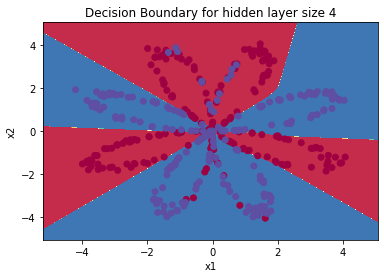

In [110]:
# Xây dựng mô hình có n_h-dimensional lớp ẩn
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)

# Vẽ biểu đồ ranh giới quyết định
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

**Kỳ vọng đầu ra**:

<table style="width:40%">
  <tr>
    <td>**Cost after iteration 9000**</td>
    <td> 0.218607 </td> 
  </tr>
  
</table>


In [111]:
# In ra độ chính xác
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 89%


**Kỳ vọng đầu ra**: 

<table style="width:15%">
  <tr>
    <td>**Accuracy**</td>
    <td> 90% </td> 
  </tr>
</table>

Độ chính xác thực sự cao so với hồi quy logistic. Mô hình đã học các mẫu lá của bông hoa! Thậm chí mạng nơ-ron có thể tìm hiểu các ranh giới quyết định phi tuyến tính, không giống như hồi quy logistic.

Bây giờ, chúng ta hãy thử một số kích thước lớp ẩn.

### 4.6 - Điều chỉnh kích thước lớp ẩn (tác vụ tùy chọn) ###

Chạy đoạn codse sau. Có thể mất 1-2 phút. Hãy quan sát các cách xử lý khác nhau của mô hình đối với các kích thước lớp ẩn khác nhau.

/var/folders/jl/87v8p9cx1ddb40vd90ddy2lw0000gn/T/ipykernel_62282/210895284.py:20: RuntimeWarning: invalid value encountered in log
  cost = -(1/m)*np.sum(np.multiply(Y,np.log(A2))+np.multiply(1-Y,np.log(1-A2)))


(2, 400) (1, 400)
Accuracy for 1 hidden units: 61.5 %
(2, 400) (1, 400)
Accuracy for 2 hidden units: 66.0 %
(2, 400) (1, 400)
Accuracy for 3 hidden units: 88.0 %
(2, 400) (1, 400)
Accuracy for 4 hidden units: 88.5 %
(2, 400) (1, 400)
Accuracy for 5 hidden units: 86.5 %
(2, 400) (1, 400)
Accuracy for 20 hidden units: 88.5 %
(2, 400) (1, 400)
Accuracy for 50 hidden units: 88.75 %


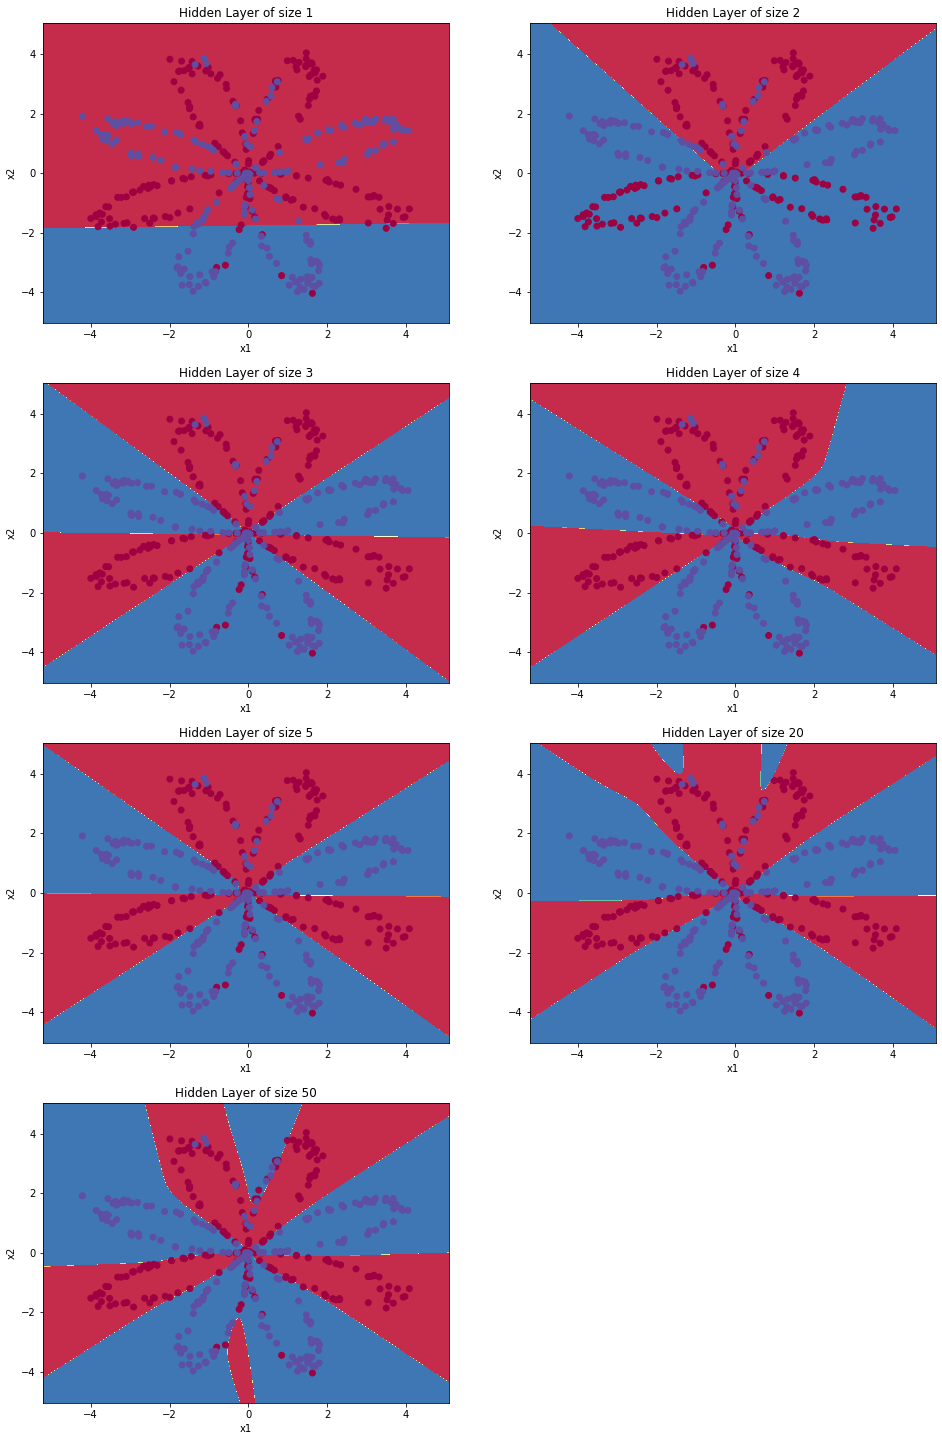

In [112]:
# Điều này có thể cần 2 phút để chạy

plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

**Giải thích**:
- Các mô hình lớn hơn (với nhiều đơn vị ẩn hơn) có thể phù hợp với tập huấn luyện tốt hơn, cho đến khi cuối cùng các mô hình lớn nhất quá khớp với dữ liệu.
- Kích thước lớp ẩn tốt nhất dường như nằm trong khoảng n_h = 5. Thật vậy, giá trị xung quanh đây có vẻ phù hợp với dữ liệu mà không gây ra overfitting đáng chú ý.
- Sau này chúng ta cũng sẽ học về chính quy hóa (regularization), cho phép sử dụng các mô hình rất lớn (chẳng hạn như n_h = 50) mà không cần nhiều overfitting.

**Câu hỏi tùy chọn**:

Một số câu hỏi mà bạn có thể khám phá nếu muốn:
- Điều gì xảy ra khi bạn thay đổi kích hoạt tanh thành kích hoạt sigmoid hoặc kích hoạt ReLU?
- Điều gì xảy ra nếu chạy với learning_rate. ?
- Nếu chúng ta thay đổi tập dữ liệu thì sao? (Xem phần 5 bên dưới!)

<font color='blue'>

**Chúng ta đã học được:**
- Xây dựng một mạng nơ-ron hoàn chỉnh với một lớp ẩn
- Sử dụng tốt đơn vị phi tuyến tính
- Thực hiện lan truyền xuôi (forward propagation) và lan truyền ngược (backpropagation), và huấn luyện một mạng nơ-ron
- Thấy tác động của việc thay đổi kích thước lớp ẩn, gồm overfitting.

Làm tốt lắm! 

## 5) Thực hiện trên các tập dữ liệu khác

Nếu muốn, chúng ta có thể chạy lại toàn bộ notebook (trừ phần tập dữ liệu) cho từng tập dữ liệu sau.

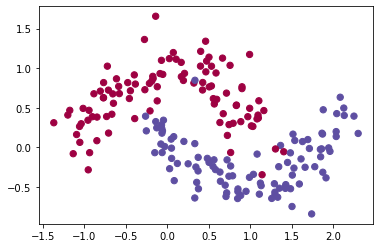

In [113]:
# Các tập dữ liệu
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

### BẮT ĐẦU CODE Ở ĐÂY ### (chọn tập dữ liệu)
dataset = "noisy_moons"
### KẾT THÚC CODE Ở ĐÂY ###

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# tạo nhị phân blob
if dataset == "blobs":
    Y = Y%2

# Trực quan hóa dữ liệu
plt.scatter(X[0, :], X[1, :], c=Y[0,:], s=40, cmap=plt.cm.Spectral);

Chúc mừng bạn đã hoàn thành Bài tập lập trình này!

Tham khảo:
- http://scs.ryerson.ca/~aharley/neural-networks/
- http://cs231n.github.io/neural-networks-case-study/